In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [3]:
N = 200
x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)
#plt.scatter(X,Y);
#np.shape(X)

In [4]:
u_inf = 1 ## freestream velocity
u_freestream = u_inf*np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N),dtype=float)

# freestream function
psi_freestream = u_inf*Y

In [5]:
def get_velocity(strength,X,Y,xs,ys):
    """
    Returns the velocity field of a source/sink.
    Parameters
    -----------
    strength: float
    xs: float
    ys: float
    X: 2D array
    Y: 2D array
    
    Returns
    --------------
    u = 2D array of x velocity field
    v = 2D array of y velocity field
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v


In [6]:
def get_stream(strength, xs, ys, X, Y):
    """
    Returns the stream-function of the source/sink
    
    Parameters
    -----------
    strength: float
    xs=float
    ys=float
    X = 2D array
    Y = 2D array
    
    Returns
    --------
    psi: 2D stream-function
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y-ys),(X-xs))
    return psi

In [28]:
strength_source = 2.0
x_source, y_source = 0.0, 0.0

#velocity field
u_source,v_source = get_velocity(strength_source,X,Y,x_source,y_source)

#stream-function
psi_source =get_stream(strength_source, x_source, y_source, X, Y)


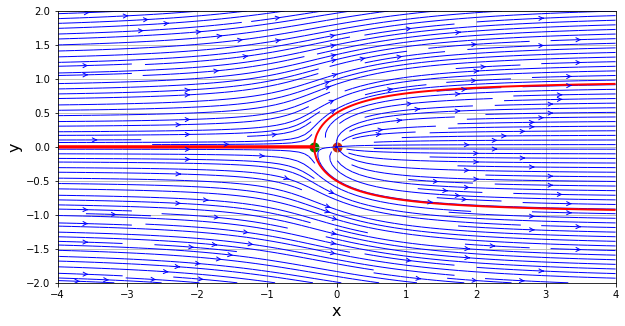

In [29]:
# superposition of the source on the freestream
u = u_source + u_freestream
v = v_source + v_freestream
psi = psi_source + psi_freestream

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1,color='blue', arrowsize=1, arrowstyle='->')
plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

## Stagnation points
y_stagnation = y_source
x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)

#plot stagnation points
plt.scatter(x_stagnation,y_stagnation, color='g',s =80,marker='o')
plt.contour(X,Y,psi,levels=[-strength_source/2,strength_source/2]
            ,colors='r',linewidths=2,linestyles='solid');

In [33]:
## source-sink pair in uniform flow

strength_sink= -1.5
x_sink, y_sink = 1.0,0.0

u_sink,v_sink = get_velocity(strength_sink,X,Y,x_sink,y_sink)
psi_sink = get_stream(strength_sink,x_sink,y_sink,X,Y)

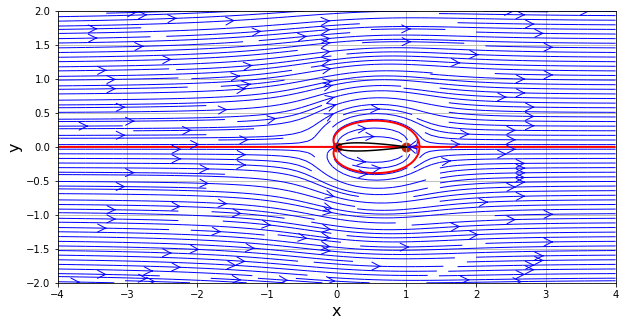

In [35]:
#Superposition of source-sink
u = u_sink + u_source + u_freestream
v = v_sink + v_source + v_freestream
psi = psi_sink + psi_source + psi_freestream

###
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1,
               color='blue', arrowsize=2, arrowstyle='->')
plt.scatter([x_source,x_sink], [y_source,y_sink],
            color='#CD2305', s=80, marker='o')
plt.contour(X,Y,psi,levels=[0.],colors='r',linewidths=2,
           linestyles='solid');
A_x = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_x.txt')
A_y = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_y.txt')
plt.plot(A_x,A_y,color='black');

## Stagnation points
#y_stagnation = y_source
#x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)

#plot stagnation points
#plt.scatter(x_stagnation,y_stagnation, color='g',s =80,marker='o')
#plt.contour(X,Y,psi,levels=[-strength_source/2,strength_source/2]
 #           ,colors='r',linewidths=2,linestyles='solid');

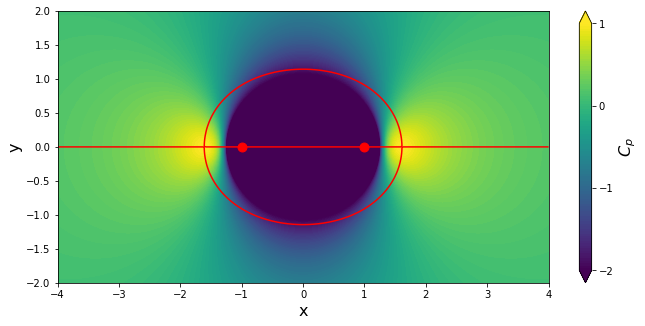

In [11]:
##BERNOULLI EQUATION
#Pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

##plot the cp field
width=10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1*width, height))
#plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X,Y,cp,
                    levels=np.linspace(-2.0,1.0,100), extend='both');
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-2.0,-1.0,0.0,1.0])
plt.scatter([x_source,x_sink],[y_source,y_sink],color='r',
           marker='o',s=80);
plt.contour(X,Y,psi,levels=[0.],colors='r');